In [2]:
import pandas as pd
A=pd.read_csv("D:/DS_Recordings/DataSets/Cars93.csv")

In [3]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [9]:
B=A[["Price","MPG.city"]]

In [10]:
B.head(2)

,Price,MPG.city
0,15.9,25
1,33.9,18


In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(B)

In [27]:
model.labels_

array([3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       0, 0, 3, 3, 3, 1, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       0, 0, 3, 2, 1, 1, 1, 1, 0, 0, 3, 3, 1, 1, 2, 3, 3, 0, 1, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 3, 3, 3, 1])

In [28]:
B['Cluster']=model.labels_   #adding column cluster in B data frame and assigning label values to it

<ipython-input-28-9900b58bc090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Cluster']=model.labels_   #adding column cluster in B data frame and assigning label values to it


In [31]:
B

,Price,MPG.city,cluster,Cluster
0,15.9,25,0,3
1,33.9,18,2,1
2,29.1,20,2,1
3,37.7,19,2,1
4,30.0,22,2,1
...,...,...,...,...
88,19.7,17,1,3
89,20.0,21,1,3
90,23.3,18,1,3
91,22.7,21,1,3


In [36]:
Q = pd.DataFrame(model.cluster_centers_,columns=["Q1","Q2","Q3","Q4"])

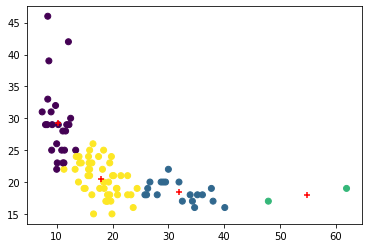

In [39]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.Cluster)
plt.scatter(Q.Q1,Q.Q2,c="red",alpha=1,marker="+")